In [45]:
import pandas as pd
import numpy as np
import re
import emojies
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import losses
from keras.layers import Embedding, Dense, Flatten, Bidirectional, LSTM, Dropout, MaxPooling1D, Conv1D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from parsivar import Normalizer, SpellCheck
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

In [15]:
def load_data(path,sh_name):
    df = pd.read_csv(path, encoding='utf-8',
                 index_col=False)
    return df

In [3]:
#### Create Function Clean for Data Frame

In [4]:
def clean(text):
    text = emojies.replace(text)
    text = re.sub("@[A-Za-z0-9]+", '', text)
    text = re.sub(r'http\S+', '', text)

    #### Convert Finiglish To Persian in Package Parsivar
    my_normilize = Normalizer(pinglish_conversion_needed=True)
    text = my_normilize.normalize(text)
    text_token = word_tokenize(text)
    tokens_without_sw = [word for word in text_token if not word in stopwords.words('persion') ]
    text = " ".join(tokens_without_sw)
    return text

In [5]:
# Load Data

In [48]:
def model_Bilstm(data):
    Data_Trian, Data_Test = train_test_split(data, test_size=0.2)
    tokenize = Tokenizer()
    tokenize.fit_on_texts(Data_Trian['clean'])

    with open('CNN_BiLSTM_6_tokenizer.pickle', 'wb') as handle:
        pickle.dump(tokenize, handle, protocol=pickle.HIGHEST_PROTOCOL)
    #tokenize.fit_on_texts(Data_Test['clean'])
    encode_Data_Trian = tokenize.texts_to_sequences(Data_Trian['clean'])
    encode_Data_Test = tokenize.texts_to_sequences(Data_Test['clean'])
    vocab_size = len(tokenize.word_index)+1

    encode_Data_Trian_tag = (pd.get_dummies(Data_Trian['tag'])).values.tolist()
    encode_Data_Test_tag = (pd.get_dummies(Data_Test['tag'])).values.tolist()
    arr = np.array(encode_Data_Trian_tag)
    arr_Test = np.array(encode_Data_Test_tag)

    Data_Trian_p = pad_sequences(encode_Data_Trian,maxlen=100,padding='post')
    Data_Test_p = pad_sequences(encode_Data_Test,maxlen=100,padding='post')

    model = Sequential()
    model.add(Embedding(vocab_size, 64, input_length=100))
    model.add(Conv1D(filters=32, kernel_size=1, activation='relu'))
    model.add(MaxPooling1D(pool_size=4))
    model.add(Bidirectional(LSTM(50, dropout=0.2, recurrent_dropout=0.3)))

    # model.add(Flatten())
    # model.add(Bidirectional(LSTM(64, return_sequences=True, input_shape=(None, 1))))
    # model.add(Dropout(0.2))
    # model.add(Bidirectional(LSTM(32)))
    # model.add(Dropout(0.2))
    # model.add(Dense(64, activation='relu'))
    # model.add(Dropout(0.1))
    # model.add(Flatten())
    # model.add(Dense(400, activation='sigmoid'))
    model.add(Dense(2, activation='softmax'))
   # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    #
    # adam = Adam(learning_rate=0.01)
    # model.compile(
    #     loss=losses.BinaryCrossentropy(from_logits=True),
    #     optimizer=adam,
    #     metrics=['accuracy']
    # )
    print(model.summary())

        # Fitting Network
    model.fit(Data_Trian_p, arr, epochs=10, verbose=2)

    # Evaluating Network
    loss, acc = model.evaluate(Data_Test_p, arr_Test, verbose=0)
    print('Test Accuracy: %f' % (acc * 100))
    print('Test loss: %f' % loss)
    model.save('CNN_LSTM_2_branch.h5')
    # model.fit(
    #     Data_Trian_p,
    #     arr,
    #     epochs=10,
    #     verbose=1,
    #     batch_size=64
    # )
    # model.evaluate()







In [ ]:
path = r"C:\\Users\\yousefi-pc\\PycharmProjects\\DataSet\\comp_dataset2.csv"
sheet='Sheet3'
Data_f = load_data(path, sheet)
Data_f

In [ ]:
Data_f['tag'].value_counts()

In [49]:
Data_f_kham = Data_f[Data_f['tag']=='خشم' ]
Data_f_shd = Data_f[Data_f['tag']=='شادی']
Data_f_ghm = Data_f[Data_f['tag']=='غم']
Data_f_omid = Data_f[Data_f['tag']=='امید']
Data_f_khoonsa = Data_f[Data_f['tag']=='خنثی']
Data_append=[Data_f_kham, Data_f_shd]# Data_f_ghm, Data_f_omid]
Data_f = pd.concat(Data_append)

In [25]:
# grouped = Data_f.groupby(Data_f.tag)
# Tanya = grouped.get_group("خشم")

In [26]:
# Tanya

In [27]:
Data_f['clean'] = Data_f['caption'].apply(lambda x:clean(x))
# Data_f['clean'] = Data_f['caption']


In [50]:
Data_f

,caption,tag,clean
0,احمق مردم ایران پول ندارن که بخرن وگرنه از این...,خشم,احمق مردم ایران پول ندارن که بخرن اینجا بدتر م...
4,@bardiyabaseri همون که تومیزنی جناااب,خشم,همون که تومیزنی جناااب
6,واقعا هدفتون الان از انتشار تصاویر این طفل معص...,خشم,هدفتون انتشار تصاویر این طفل معصوم‌ها چیه ! ! ...
7,اروای عمش,خشم,اروای عمش
14,دوربین رو بچرخون تو اتاق تا ملت ببینن چقدر از ...,خشم,دوربین بچرخون اتاق ملت ببینن امکانات بیت المال...
...,...,...,...
15147,@hadanmoosavi بالاخره بعد از سال‌ها سینه‌خیز ر...,شادی,سال‌ها سینه‌خیز رفتن ، پذیرفتید که ظریف متن بر...
15148,@official_hashar @mahtab_kocholoo با این که بح...,شادی,_ hashar _ کوچولو این که بحث بسیار جدیست و اخت...
15149,نیکی هیلی ، سفیر سابق #امریکا در سازمان ملل طی...,شادی,نیکی هیلی ، سفیر سابق # امریکا سازمان ملل طی پ...
15150,دوشنبه 7 فوریه ، بنت طی یک نشست مطبوعاتی به خب...,شادی,دوشنبه 7 فوریه ، بنت طی یک نشست مطبوعاتی خبرنگ...


In [51]:
Data_f['tag'].value_counts()

شادی    3650
خشم     2683
Name: tag, dtype: int64

<AxesSubplot:>

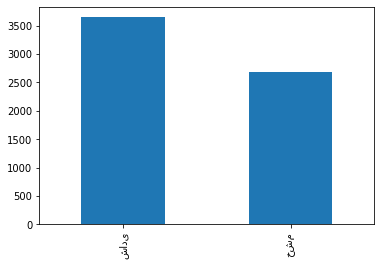

In [52]:
Data_f['tag'].value_counts().plot(kind='bar')
#Data_f['tag'].value_counts().plot(kind="pie")

In [53]:
model_Bilstm(Data_f)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 64)           946624    
                                                                 
 conv1d_8 (Conv1D)           (None, 100, 32)           2080      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 25, 32)           0         
 1D)                                                             
                                                                 
 bidirectional_8 (Bidirectio  (None, 100)              33200     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 2)                 202       
                                                                 
Total params: 982,106
Trainable params: 982,106
Non-tr